In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import losses
from keras import metrics
from keras import models
from keras import layers
from keras import regularizers
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Using TensorFlow backend.


In [2]:
# read the data
dataInput1 = np.array(pd.read_csv(r"E:\Identify_python\NNIdentify\csv_data\dataInput1.csv",
                                  header=None))
dataInput2 = np.array(pd.read_csv(r"E:\Identify_python\NNIdentify\csv_data\dataInput2.csv",
                                  header=None))
dataInput3 = np.array(pd.read_csv(r"E:\Identify_python\NNIdentify\csv_data\dataInput3.csv",
                                  header=None))

dataInput = np.append(dataInput1, dataInput2, axis=1)
dataInput = np.append(dataInput, dataInput3, axis=1)
dataInput = dataInput.T

dataOutput1 = np.array(pd.read_csv(r"E:\Identify_python\NNIdentify\csv_data\tau_filt1.csv",
                                  header=None))
dataOutput2 = np.array(pd.read_csv(r"E:\Identify_python\NNIdentify\csv_data\tau_filt2.csv",
                                  header=None))
dataOutput3 = np.array(pd.read_csv(r"E:\Identify_python\NNIdentify\csv_data\tau_filt3.csv",
                                  header=None))

dataOutput = np.append(dataOutput1, dataOutput2, axis=1)
dataOutput = np.append(dataOutput, dataOutput3, axis=1)
dataOutput = dataOutput.T

In [3]:
train_data = np.append(dataInput1.T[0:3000], dataInput2.T[0:3000], axis=0)
train_data = np.append(train_data, dataInput3.T[0:3000], axis=0)

train_target = np.append(dataOutput1.T[0:3000], dataOutput2.T[0:3000], axis=0)
train_target = np.append(train_target, dataOutput3.T[0:3000], axis=0)

test_data = np.append(dataInput1.T[3000:], dataInput2.T[3000:], axis=0)
test_data = np.append(test_data, dataInput3.T[3000:], axis=0)

test_target = np.append(dataOutput1.T[3000:], dataOutput2.T[3000:], axis=0)
test_target = np.append(test_target, dataOutput3.T[3000:], axis=0)

In [4]:
def historyPlot(history4):
    plt.figure("history-1")
    loss = history4.history['loss']
    val_loss = history4.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b', label='Training loss', c="red")
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.figure("history-2")
    acc = history4.history['acc']
    val_acc = history4.history['val_acc']
    plt.plot(epochs, acc, 'b', label='Training acc', c = "red")
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    print(np.max(val_acc ,axis=0))
    print(np.where(val_acc == np.max(val_acc,axis=0)))

In [37]:
model1 = models.Sequential()
model1.add(layers.Dense(50, activation="relu",
                        kernel_regularizer=regularizers.l2(0.001) , input_shape=(18, )))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(50,
                        kernel_regularizer=regularizers.l2(0.001) ,activation="relu"))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(6))
model1.compile(optimizer='rmsprop', loss='mse', metrics=['mae', "accuracy"])
history1 = model1.fit(train_data,
                    train_target,
                    epochs=100,
                    batch_size=64,
                    validation_data=(test_data, test_target))

Train on 9000 samples, validate on 1995 samples
Epoch 1/100
9000/9000 [==============================] - 1s 75us/step - loss: 1190.6410 - mean_absolute_error: 22.2510 - acc: 0.5252 - val_loss: 990.6150 - val_mean_absolute_error: 20.5956 - val_acc: 0.5534
Epoch 2/100
9000/9000 [==============================] - 0s 26us/step - loss: 786.7655 - mean_absolute_error: 17.7655 - acc: 0.7284 - val_loss: 569.5349 - val_mean_absolute_error: 15.3357 - val_acc: 0.6216
Epoch 3/100
9000/9000 [==============================] - ETA: 0s - loss: 459.0843 - mean_absolute_error: 13.7580 - acc: 0.77 - 0s 26us/step - loss: 455.5155 - mean_absolute_error: 13.7110 - acc: 0.7779 - val_loss: 407.1966 - val_mean_absolute_error: 13.2316 - val_acc: 0.6672
Epoch 4/100
9000/9000 [==============================] - 0s 26us/step - loss: 318.9912 - mean_absolute_error: 11.6620 - acc: 0.8181 - val_loss: 343.6882 - val_mean_absolute_error: 12.1522 - val_acc: 0.7078
Epoch 5/100
9000/9000 [==============================] - 

9000/9000 [==============================] - 0s 27us/step - loss: 77.4384 - mean_absolute_error: 5.8097 - acc: 0.9389 - val_loss: 74.8412 - val_mean_absolute_error: 5.3501 - val_acc: 0.9153
Epoch 41/100
9000/9000 [==============================] - 0s 23us/step - loss: 76.4984 - mean_absolute_error: 5.7580 - acc: 0.9384 - val_loss: 76.5857 - val_mean_absolute_error: 5.3391 - val_acc: 0.9073
Epoch 42/100
9000/9000 [==============================] - 0s 21us/step - loss: 74.4686 - mean_absolute_error: 5.6826 - acc: 0.9370 - val_loss: 79.5751 - val_mean_absolute_error: 5.3763 - val_acc: 0.9108
Epoch 43/100
9000/9000 [==============================] - 0s 22us/step - loss: 73.7963 - mean_absolute_error: 5.6605 - acc: 0.9437 - val_loss: 75.2039 - val_mean_absolute_error: 5.2029 - val_acc: 0.9183
Epoch 44/100
9000/9000 [==============================] - 0s 21us/step - loss: 74.6860 - mean_absolute_error: 5.6841 - acc: 0.9389 - val_loss: 72.4379 - val_mean_absolute_error: 5.1792 - val_acc: 0.917

9000/9000 [==============================] - 0s 27us/step - loss: 62.7704 - mean_absolute_error: 5.1687 - acc: 0.9454 - val_loss: 64.2823 - val_mean_absolute_error: 4.8101 - val_acc: 0.9328
Epoch 81/100
9000/9000 [==============================] - 0s 23us/step - loss: 63.7872 - mean_absolute_error: 5.1900 - acc: 0.9466 - val_loss: 67.2733 - val_mean_absolute_error: 4.8531 - val_acc: 0.9238
Epoch 82/100
9000/9000 [==============================] - 0s 21us/step - loss: 62.2106 - mean_absolute_error: 5.1390 - acc: 0.9474 - val_loss: 59.4522 - val_mean_absolute_error: 4.6971 - val_acc: 0.9293
Epoch 83/100
9000/9000 [==============================] - 0s 22us/step - loss: 63.2970 - mean_absolute_error: 5.1969 - acc: 0.9484 - val_loss: 65.7302 - val_mean_absolute_error: 4.8177 - val_acc: 0.9268
Epoch 84/100
9000/9000 [==============================] - 0s 31us/step - loss: 62.7947 - mean_absolute_error: 5.1511 - acc: 0.9446 - val_loss: 63.1226 - val_mean_absolute_error: 4.7202 - val_acc: 0.931

0.9167919799498747
(array([63, 65], dtype=int64),)


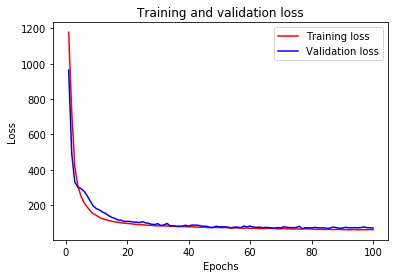

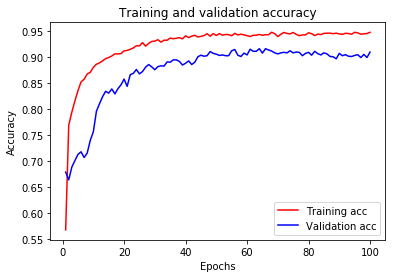

In [29]:
historyPlot(history1)

In [9]:
model_final2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                950       
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 306       
Total params: 3,806
Trainable params: 3,806
Non-trainable params: 0
_________________________________________________________________


In [10]:
test_out_paper = model_final2.predict(dataInput)

In [11]:
model_final3 = models.Sequential()
model_final3.add(layers.Dense(50, activation="relu", input_shape=(18, )))
model_final3.add(layers.Dropout(0.2))
model_final3.add(layers.Dense(50, activation="relu"))
model_final3.add(layers.Dropout(0.2))
model_final3.add(layers.Dense(6))
model_final3.compile(optimizer='rmsprop', loss='mse', metrics=['mae', "accuracy"])
history_final3 = model_final3.fit(dataInput,
                    dataOutput,
                    epochs=8,
                    batch_size=64,
                    validation_data=(test_data, test_target))

Train on 10995 samples, validate on 1995 samples
Epoch 1/8
10995/10995 [==============================] - 1s 46us/step - loss: 1161.9132 - mean_absolute_error: 21.9243 - acc: 0.4781 - val_loss: 881.5768 - val_mean_absolute_error: 19.4308 - val_acc: 0.6346
Epoch 2/8
10995/10995 [==============================] - 0s 39us/step - loss: 655.1977 - mean_absolute_error: 16.2912 - acc: 0.7494 - val_loss: 376.3372 - val_mean_absolute_error: 12.8965 - val_acc: 0.6932
Epoch 3/8
10995/10995 [==============================] - 0s 24us/step - loss: 379.1843 - mean_absolute_error: 12.7456 - acc: 0.7888 - val_loss: 217.3610 - val_mean_absolute_error: 9.9649 - val_acc: 0.7554
Epoch 4/8
10995/10995 [==============================] - 0s 37us/step - loss: 283.9945 - mean_absolute_error: 11.1053 - acc: 0.8153 - val_loss: 171.8156 - val_mean_absolute_error: 8.9864 - val_acc: 0.7669
Epoch 5/8
10995/10995 [==============================] - 0s 20us/step - loss: 234.1866 - mean_absolute_error: 10.1827 - acc: 0.8

In [12]:
fake_output = model_final3.predict(dataInput)

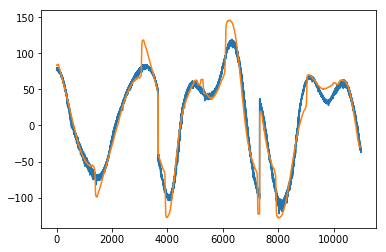

In [13]:
plt.plot(fake_output[:,1])
plt.plot(dataOutput[:,1])

In [14]:
for i in range(6):
    fake_output[:,i] = signal.medfilt(fake_output[:,i], 99)

NameError: name 'signal' is not defined

In [ ]:
plt.plot(fake_output[:,1], label="Predict")
plt.plot(dataOutput[:,1], label="Experiment")
plt.legend()


In [ ]:
fake_output = fake_output.reshape((3, -1, 6))

In [ ]:
fake_output = fake_output[0]

In [ ]:
plt.plot(fake_output)

In [ ]:
plt.plot(dataOutput1.T[:,1])
plt.plot(fake_output[:,1])

In [ ]:
model_final3.summary()

In [18]:
history1.history

{'val_loss': [1193.5646629467344,
  985.4365647394854,
  711.6483697723924,
  510.32724074743743,
  398.4559196453047,
  350.6592604825969,
  320.711594522806,
  303.18709379879755,
  290.5753621763454,
  270.77137616953456,
  253.984507397721,
  241.12427736822525,
  218.6132085699784,
  205.38264869556093,
  195.86023091672357,
  191.60354564924884,
  186.3326565524988,
  175.40144891380368,
  166.61352820719094,
  160.0214161655359,
  158.7383095150902,
  152.86596824435662,
  144.96485291483407,
  141.06372075857675,
  137.72272537919812,
  128.40853733263518,
  129.23956133046545,
  122.63655151520157,
  118.429828854133,
  120.49857245997379,
  117.96385129962052,
  115.90369951826588,
  109.92180523023869,
  117.44833322778382,
  108.82277967792406,
  101.76399280863598,
  103.45465993666112,
  100.59306008092742,
  102.52380712217555,
  98.17516283498969,
  99.67536514301348,
  97.59909048247755,
  96.09620863261976,
  95.80630715735873,
  93.8240825146362,
  90.62401189588962,

In [19]:
history1.history.values

<function dict.values>

In [38]:
out = history1.history

In [39]:
type(out)

dict

In [40]:
out.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_acc', 'loss', 'mean_absolute_error', 'acc'])

In [53]:
val_loss = out['val_loss']
val_acc = out['val_acc']
loss = out['loss']
acc = out["acc"]

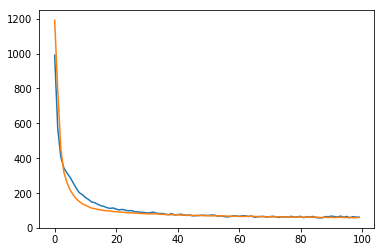

In [54]:
plt.plot(val_loss)
plt.plot(loss)

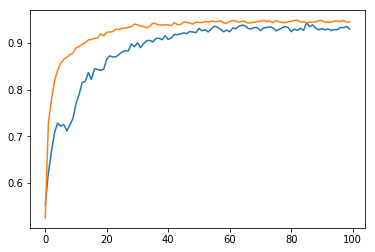

In [55]:
plt.plot(val_acc)
plt.plot(acc)

In [56]:
type(val_acc)

list

In [57]:
val_acc = np.array(val_acc)
acc = np.array(acc)
val_loss = np.array(val_loss)
loss = np.array(loss)

In [59]:
np.savetxt("val_acc.txt", val_acc)

In [62]:
np.savetxt("loss.txt", loss)